In [2]:
import numpy as np
from scipy.stats import gamma as gamma_dist

def gen_disc_gamma(max_x, alpha_shape, beta_rate):
    pdf_vals = []
    for x in range(1, max_x+1):
        pdf_vals.append(gamma_dist.pdf(x * beta_rate, alpha_shape))
    normalizer = sum(pdf_vals)
    return [pdf_val / normalizer for pdf_val in pdf_vals]



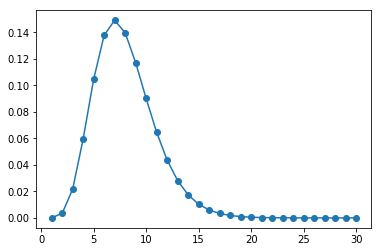

In [3]:
xs = list(range(1,30+1))
ys = gen_disc_gamma(30, 8, 1)

import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xs, ys, marker='o')

In [4]:
np.random.gamma(1,1)

1.817051072871176

Text(0.5,1,'Gamma(8, beta) distribution samples, where beta ~ Gamma(1,1)')

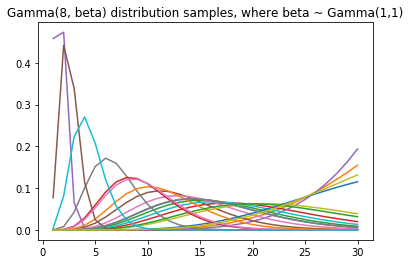

In [5]:
xs = list(range(1,30+1))
for _ in range(20):
    beta_rate = np.random.gamma(1,1)
    ys = gen_disc_gamma(30, 8, beta_rate)
    plt.plot(xs, ys,  label='Sampled beta {:.2f}'.format(beta_rate))
plt.title("Gamma(8, beta) distribution samples, where beta ~ Gamma(1,1)")

Text(0.5,1,'Gamma(8, beta) distribution samples, where beta ~ Gamma(10,10)')

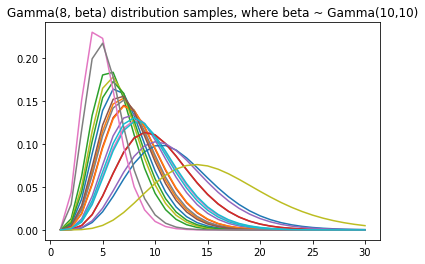

In [6]:
xs = list(range(1,30+1))
for _ in range(20):
    beta_rate = np.random.gamma(10,1/10)
    ys = gen_disc_gamma(30, 8, beta_rate)
    plt.plot(xs, ys, label='Sampled beta {:.2f}'.format(beta_rate))
plt.title("Gamma(8, beta) distribution samples, where beta ~ Gamma(10,10)")

Text(0.5,1,'Gamma(8, beta) distribution samples, where beta ~ Gamma(5,5)')

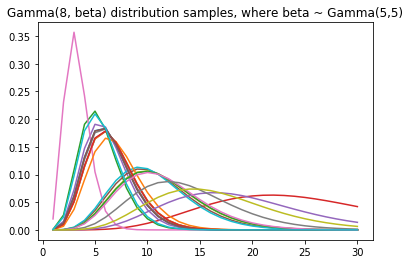

In [7]:
xs = list(range(1,30+1))
for _ in range(20):
    beta_rate = np.random.gamma(5,1/5)
    ys = gen_disc_gamma(30, 8, beta_rate)
    plt.plot(xs, ys, label='Sampled beta {:.2f}'.format(beta_rate))
plt.title("Gamma(8, beta) distribution samples, where beta ~ Gamma(5,5)")

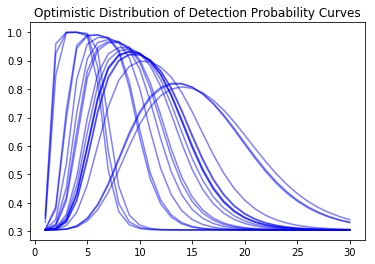

In [8]:
from math import exp

def gen_detection_probs(infection_dist, A, B, C):
    return [1 / (1 + A * exp(-B * (inf - C))) for inf in infection_dist]

xs = list(range(1,30+1))
for _ in range(20):
    beta_rate = np.random.gamma(5,1/5)
    zs = gen_disc_gamma(30, 8, beta_rate)
    ys = gen_detection_probs(zs, 1.25, 30, 0.02)
    plt.plot(xs, ys, label='Detection Probability', color='blue', alpha=0.5)
plt.title("Optimistic Distribution of Detection Probability Curves")
plt.show()

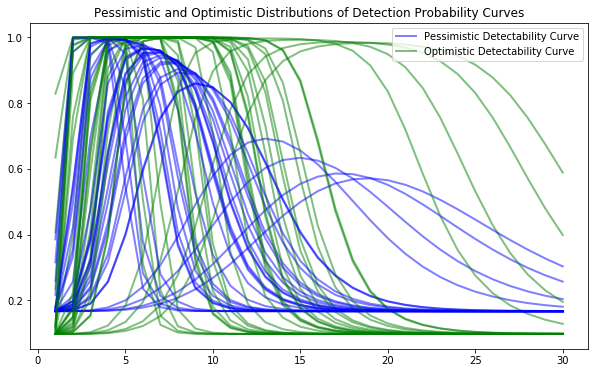

In [9]:
from math import exp

def gen_detection_probs(infection_dist, A, B, C):
    return [1 / (1 + A * exp(-B * (inf - C))) for inf in infection_dist]

xs = list(range(1,30+1))
optimistic_label='Optimistic Detectability Curve'
pess_label = 'Pessimistic Detectability Curve'
plt.figure(figsize=(10,6))
for _ in range(30):
    beta_rate = np.random.gamma(5,1/5)
    zs = gen_disc_gamma(30, 8, beta_rate)
    ys = gen_detection_probs(zs, 1.5, 30, 0.04)
    plt.plot(xs, ys, color='blue', alpha=0.5, linewidth=2, label=pess_label)
    pess_label=None
    ys = gen_detection_probs(zs, 1.25, 100, 0.02)
    plt.plot(xs, ys, label=optimistic_label, color='green', alpha=0.5, linewidth=2)
    optimistic_label=None
plt.title("Pessimistic and Optimistic Distributions of Detection Probability Curves")
plt.legend(loc='best')
plt.show()

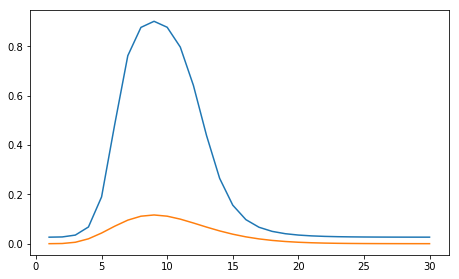

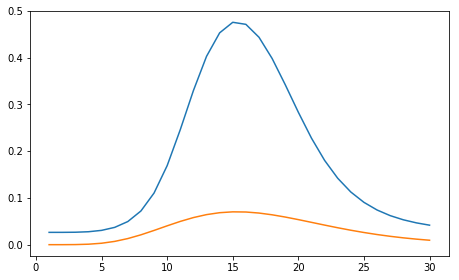

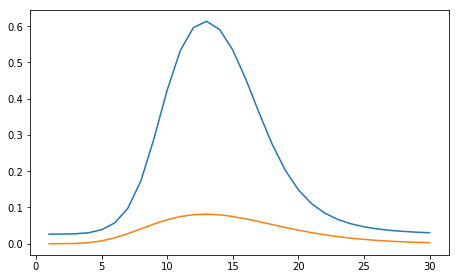

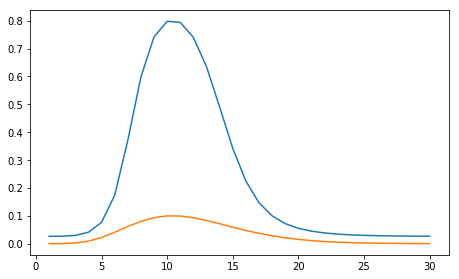

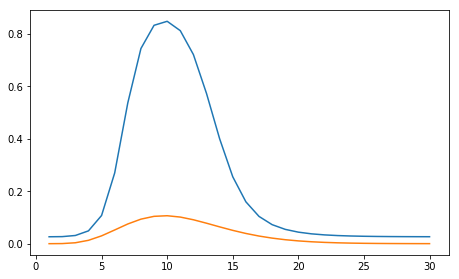

In [10]:
from math import exp

def gen_detection_probs(infection_dist, A, B, C):
    return [1 / (1 + A * exp(-B * (inf - C))) for inf in infection_dist]

xs = list(range(1,30+1))
for _ in range(5):
    beta_rate = np.random.gamma(5,1/5)
    zs = gen_disc_gamma(30, 8, beta_rate)
    ys = gen_detection_probs(zs, 5, 50, 0.04)
    plt.figure(figsize=(7.5,4.5))
    plt.plot(xs, ys, label='Detection Probability')
    plt.plot(xs, zs, label='Transmission Probability')
    plt.show()

In [11]:
opt_params = (1.25, 100, 0.02)
pess_params = (1.5, 30, 0.04)

def sample_iso_time(gamma, params, d):
    beta_rate = np.random.gamma(5,1/5)
    infxn_curve = gen_disc_gamma(30,8,beta_rate)
    detect_curve = gen_detection_probs(infxn_curve, params[0], params[1], params[2])
    xs = list(range(1,30+1))
    detection_time = 100
    for day, transmit_prob, detect_prob in zip(xs, infxn_curve, detect_curve):
        report_prob = gamma * transmit_prob
        assert(report_prob <= 1)
        if np.random.uniform() <= report_prob and np.random.uniform() <= detect_prob:
            detection_time = day
            break
    return detection_time + d

opt_iso_times = []
pess_iso_times = []
gamma = 0.8
d = 3
for _ in range(1000):
    opt_iso_times.append(sample_iso_time(gamma, opt_params, d))
    pess_iso_times.append(sample_iso_time(gamma, pess_params, d))
    

Optimistic detectability curve self-report fraction: 0.537
Optimistic average time-to-self-report, conditioned on self-reporting at all: 11.504655493482309
Pessimistic detectability curve self-report fraction: 0.427
Pessimistic average time-to-self-report, conditioned on self-reporting at all: 12.074941451990632


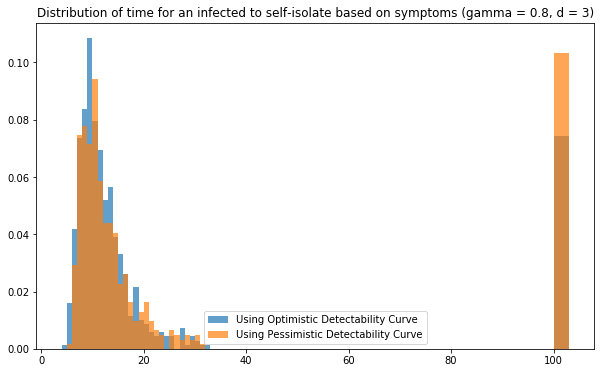

In [12]:
bins = list(range(1+d, 31+d)) + [100, 103]
plt.figure(figsize=(10,6))
plt.hist(opt_iso_times, alpha=0.7, normed=True, bins=bins, label='Using Optimistic Detectability Curve')
plt.hist(pess_iso_times, alpha=0.7, normed=True, bins=bins, label='Using Pessimistic Detectability Curve')
plt.legend()
plt.title("Distribution of time for an infected to self-isolate based on symptoms (gamma = 0.8, d = 3)")


opt_report_times = [time for time in opt_iso_times if time < 100]
pess_report_times = [time for time in pess_iso_times if time < 100]

print("Optimistic detectability curve self-report fraction: {}".format(len(opt_report_times)/ len(opt_iso_times)))
print("Optimistic average time-to-self-report, conditioned on self-reporting at all: {}".format(np.mean(opt_report_times)))


print("Pessimistic detectability curve self-report fraction: {}".format(len(pess_report_times)/ len(pess_iso_times)))
print("Pessimistic average time-to-self-report, conditioned on self-reporting at all: {}".format(np.mean(pess_report_times)))

(array([0.03367347, 0.00785714, 0.00204082, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.05846939]),
 array([  5. ,  14.8,  24.6,  34.4,  44.2,  54. ,  63.8,  73.6,  83.4,
         93.2, 103. ]),
 <a list of 10 Patch objects>)

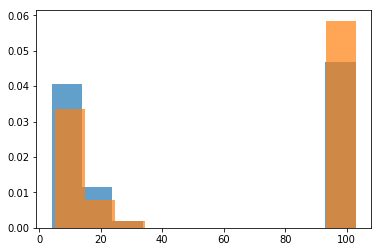

In [13]:

plt.hist(opt_iso_times, label='opt', alpha=0.7, normed=True)
plt.hist(pess_iso_times, label='pess', alpha=0.7, normed=True)

In [15]:
a = [1]
a[:100]

[1]

In [16]:
def sample_transmission_sum(gamma, params, d):
    beta_rate = np.random.gamma(5,1/5)
    infxn_curve = gen_disc_gamma(30,8,beta_rate)
    detect_curve = gen_detection_probs(infxn_curve, params[0], params[1], params[2])
    xs = list(range(1,30+1))
    detection_time = 100
    for day, transmit_prob, detect_prob in zip(xs, infxn_curve, detect_curve):
        report_prob = gamma * transmit_prob
        assert(report_prob <= 1)
        if np.random.uniform() <= report_prob and np.random.uniform() <= detect_prob:
            detection_time = day
            break
    iso_time = detection_time + d
    return sum(infxn_curve[:iso_time])
    

opt_vals = []
pess_vals = []
gamma = 0.8
d = 3
for _ in range(1000):
    opt_vals.append(sample_transmission_sum(gamma, opt_params, d))
    pess_vals.append(sample_transmission_sum(gamma, pess_params, d))

print(np.mean(opt_vals))
print(np.mean(pess_vals))
    

0.877715779599125
0.9033349084288307
